In [47]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

import os

# Feature detectors

In [65]:
from feature_detector import extract_keypoints_and_descriptors

In [58]:
test_imgs_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 
                              'test_imgs')
image_path_1 = os.path.join(test_imgs_path,'cam2_1.jpg')
image_path_2 = os.path.join(test_imgs_path, 'cam1_1.jpg')

## ORB detector

In [59]:
(kp1, d1), (kp2, d2) = extract_keypoints_and_descriptors(image_path_1,
                                                         image_path_2,
                                                         detector_type='ORB')

In [60]:
img1 = cv.drawKeypoints(cv.imread(image_path_1, cv.IMREAD_GRAYSCALE), 
                        kp1, 
                        None, 
                        color=(0,255,0), 
                        flags=cv.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
img2 = cv.drawKeypoints(cv.imread(image_path_2, cv.IMREAD_GRAYSCALE), 
                        kp1, 
                        None, 
                        color=(0,255,0), 
                        flags=cv.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

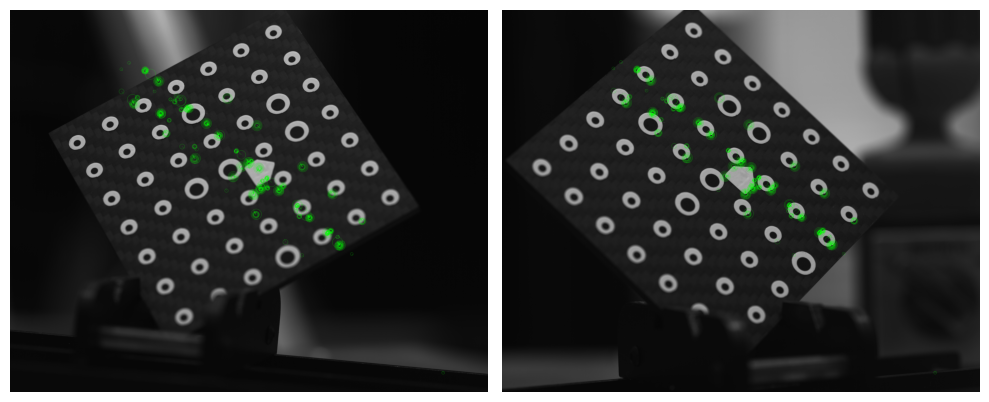

In [61]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img2)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img1)
plt.axis('off')

plt.tight_layout()
plt.show()

## SIFT detector

In [62]:
(kp1, d1), (kp2, d2) = extract_keypoints_and_descriptors(image_path_1,
                                                         image_path_2,
                                                         detector_type='SIFT')

In [63]:
img1 = cv.drawKeypoints(cv.imread(image_path_1, cv.IMREAD_GRAYSCALE), 
                        kp1, 
                        None, 
                        color=(0,255,0), 
                        flags=cv.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
img2 = cv.drawKeypoints(cv.imread(image_path_2, cv.IMREAD_GRAYSCALE), 
                        kp1, 
                        None, 
                        color=(0,255,0), 
                        flags=cv.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

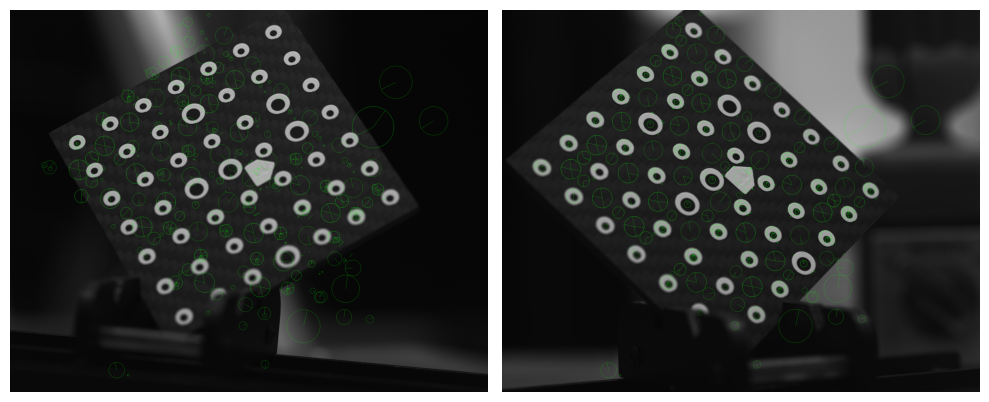

In [64]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img2)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img1)
plt.axis('off')

plt.tight_layout()
plt.show()

## Summary

Использовать SIFT не будем, т.к. скорость его работы низка, да и как видно, при матчинге будет очень много несоответствий.  
ORB тоже показывает неудовлетворительные результаты, т.к. как видно он не отмечает все точки на объекте равномерно.  

Решения:
1. Попробовать детекторы на основе DL (SuperPoint, D2Net, R2D2)
2. Если и это не поможет, то можно будет использовать сегментацию чтобы отделить сам объект от фона и уже только на нем искать характеристические точки